In [ ]:
# libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import os
!pip install wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import string
string.punctuation
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
data=pd.read_csv("IMDB Dataset.csv")
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [6]:
data.shape

(50000, 2)

In [7]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [8]:
#Data preprocessing and cleaning
data.review=data.review.str.lower()

In [9]:
data.review

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. <br /><br />the...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [10]:
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [16]:
def remove_punct(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [17]:
data['review']=data['review'].apply(lambda x : remove_punct(x))

In [19]:
data['review'] = data['review'].str.replace(r'http\S+|www.\S+','',case=False)
data['review'] = data['review'].str.replace('\d+','')
data.iloc[100,0]

'this short film that inspired the soontobe full length feature  spatula madness  is a hilarious piece that contends against similar cartoons yielding multiple writers the short film stars edward the spatula who after being fired from his job joins in the fight against the evil spoons this premise allows for some funny content near the beginning but is barely present for the remainder of the feature this films minute running time is absorbed by some oddball comedy and a small musical number unfortunately not much else lies below it the plot that is set up doesnt really have time to show but its surely follows it plot better than many highbudget hollywood films this film is worth watching at least a few times take it for what it is and dont expect a deep story'

In [20]:
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [23]:
lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [24]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") for w in w_tokenizer.tokenize(text)]

In [25]:
data['review'] = data.review.apply(lambda x :' '.join(lemmatize_text(x)))
data.iloc[100,0]

'short film inspire soontobe full length feature spatula madness hilarious piece contend similar cartoon yield multiple writers short film star edward spatula fire job join fight evil spoon premise allow funny content near begin barely present remainder feature film minute run time absorb oddball comedy small musical number unfortunately much else lie plot set doesnt really time show surely follow plot better many highbudget hollywood film film worth watch least time take dont expect deep story'

In [26]:
data['review'] = (data['review'].astype("str").str.rstrip())
data.iloc[100,0]

'short film inspire soontobe full length feature spatula madness hilarious piece contend similar cartoon yield multiple writers short film star edward spatula fire job join fight evil spoon premise allow funny content near begin barely present remainder feature film minute run time absorb oddball comedy small musical number unfortunately much else lie plot set doesnt really time show surely follow plot better many highbudget hollywood film film worth watch least time take dont expect deep story'

In [27]:
#Splitting data
train_reviews=data.review[:40000]
train_sentiments=data.sentiment[:40000]
test_reviews=data.review[40000:]
test_sentiments=data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


In [28]:
norm_train_reviews=data.review[:40000]
norm_train_reviews[0]

'one reviewers mention watch oz episode youll hook right exactly happen mebr br first thing strike oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordbr br call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cells glass front face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffle death star dodgy deal shady agreements never far awaybr br would say main appeal show due fact go show wouldnt dare forget pretty picture paint mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw strike nasty surreal couldnt say ready watch develop taste oz get accustom high level graphic violence violence injustice crook guard wholl sell nickel inmates wholl kill order get away well mannered middle class inmates turn prison bitch due 

In [29]:
norm_test_reviews=data.review[40000:]
norm_test_reviews[45005]

'read review watch piece cinematic garbage take least page find somebody else didnt think appallingly unfunny montage wasnt acme humour indeed era isnt least funny set sketch comedy ive ever see itll till come along half skits already do infinitely better act monty python woody allen say nice piece animation last second highlight film would still get close sum mindless drivelridden waste minutes seminal comedy world seminal really mean semen scatological humour world scat actually feces precursor joke mean handbook comedy tits bum odd beaver niceif pubescent boy least one hand free havent find playboy exist give break early way sketch comedy go back least ten years prior way could even forgive film even make gunpoint retro hardly sketch clown subtly pervert children may cut edge circle could actually funny come really quite sad keep go throughout entire minutes sheer belief may save genuinely funny skit end give film lower scoreand recommend insomniacs coma patientsor perhaps people su

In [30]:
#Bag of words model
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

In [31]:
cv_train_reviews=cv.fit_transform(norm_train_reviews)
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)


BOW_cv_train: (40000, 6163447)
BOW_cv_test: (10000, 6163447)


<function matplotlib.pyplot.show(close=None, block=None)>

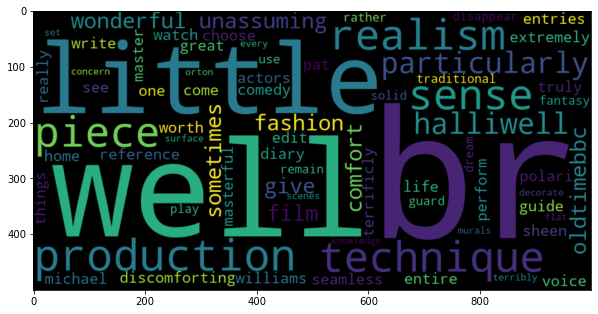

In [32]:
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

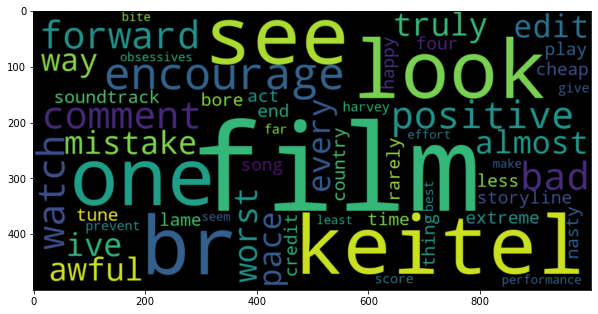

In [33]:
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

In [34]:
data = data.drop_duplicates(subset='review', keep="first")

In [36]:
from textblob import TextBlob

In [37]:
pol = lambda x: TextBlob(x).sentiment.polarity
data['polarity'] = data['review'].apply(pol)
data.head(5)

,review,sentiment,polarity
0,one reviewers mention watch oz episode youll h...,positive,0.023709
1,wonderful little production br br film techniq...,positive,0.127604
2,think wonderful way spend time hot summer week...,positive,0.340476
3,basically theres family little boy jake think ...,negative,0.032812
4,petter matteis love time money visually stun f...,positive,0.223643


<AxesSubplot:>

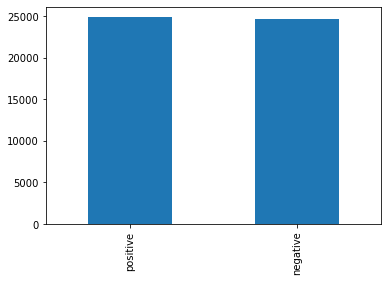

In [38]:
data.sentiment.value_counts().plot.bar()

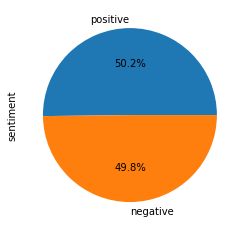

In [39]:
data.sentiment.value_counts().plot.pie(autopct="%.1f%%");

In [41]:
#neutral reviews
data['sentiment2'] = np.where(data['polarity']< 0,  'Negative',
                             np.where(data['polarity'] > 0,'Positive', 'Neutral'))
data.head()

,review,sentiment,polarity,sentiment2
0,one reviewers mention watch oz episode youll h...,positive,0.023709,Positive
1,wonderful little production br br film techniq...,positive,0.127604,Positive
2,think wonderful way spend time hot summer week...,positive,0.340476,Positive
3,basically theres family little boy jake think ...,negative,0.032812,Positive
4,petter matteis love time money visually stun f...,positive,0.223643,Positive


<AxesSubplot:>

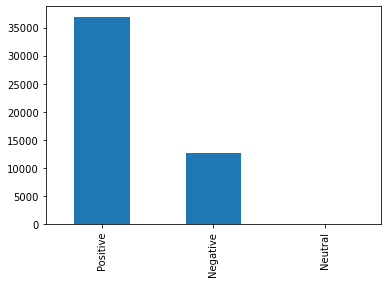

In [42]:
data.sentiment2.value_counts().plot.bar()